In [101]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import researchpy as rp

pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.4f' % x)

In [10]:
df = pd.read_csv(r'D:/python/bootcamp/week_05/dataset/pricing.csv', sep=';')
df.shape

(3448, 2)

In [11]:
df.head()

,category_id,price
0,489756,32.1178
1,361254,30.7114
2,361254,31.5726
3,489756,34.5438
4,489756,47.2058


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3448 entries, 0 to 3447
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   category_id  3448 non-null   int64  
 1   price        3448 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 54.0 KB


In [13]:
df['category_id'].unique()

array([489756, 361254, 874521, 326584, 675201, 201436], dtype=int64)

In [14]:
[df[df['category_id']==cat].shape[0] for cat in df['category_id'].unique()]

[1705, 620, 750, 145, 131, 97]

In [32]:
item_cat_price = {}
for cat in df['category_id'].unique():
    item_cat_price['cat_ID_' + str(cat)] = df[df['category_id']==cat]['price']

In [16]:
[len(vals) for _, vals in item_cat_price.items()]

[1705, 620, 750, 145, 131, 97]

In [38]:
dataset = pd.DataFrame(data= [len(vals) for _, vals in item_cat_price.items()], index= [*item_cat_price.keys()], columns=['Number of price'])
dataset

,Number of price
cat_ID_489756,1705
cat_ID_361254,620
cat_ID_874521,750
cat_ID_326584,145
cat_ID_675201,131
cat_ID_201436,97


In [23]:
[*item_cat_price.keys()]

['cat_ID_489756',
 'cat_ID_361254',
 'cat_ID_874521',
 'cat_ID_326584',
 'cat_ID_675201',
 'cat_ID_201436']

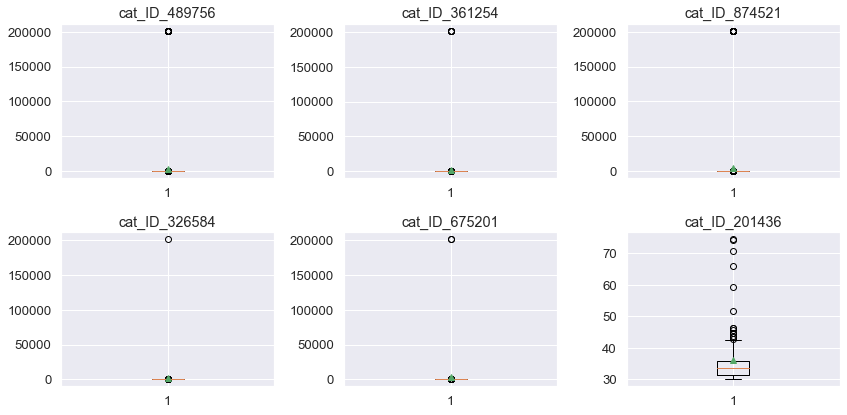

In [37]:
sns.set(font_scale=1.2)
fig, ax = plt.subplots(2,3, figsize=(12,6))
i = 0
for key, vals in item_cat_price.items():
    ax[i//3,i%3].boxplot(vals, showmeans=True)
    ax[i//3,i%3].set_title(key)
    ax[i//3,i%3].set_xlabel('')
    i+=1
plt.tight_layout()
plt.show()

In [42]:
def check_outlier(cat_dict):
    for key, vals in cat_dict.items():
        q1 = vals.quantile(0.75)
        q3 = vals.quantile(0.25)
        iqr = (q1 - q3)*1.5
        upper = q1 + iqr
        lower = q3 - iqr if (q3 - iqr) > 0 else q3
        vals = [val if val<upper else upper for val in vals]
        vals = [val if val>lower else lower for val in vals]
        cat_dict[key] = vals
    return cat_dict

In [43]:
item_cat_price_cleaned = check_outlier(item_cat_price)

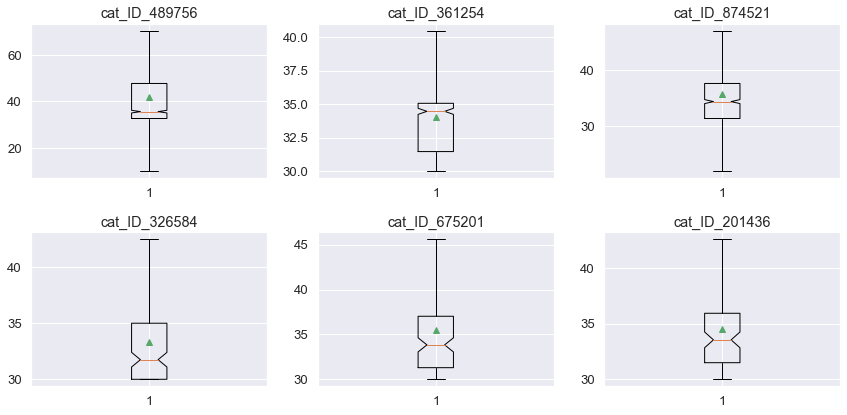

In [44]:
sns.set(font_scale=1.2)
fig, ax = plt.subplots(2,3, figsize=(12,6))
i = 0
for key, vals in item_cat_price_cleaned.items():
    ax[i//3,i%3].boxplot(vals, showmeans=True, notch=True)
    ax[i//3,i%3].set_title(key)
    i+=1
plt.tight_layout()
plt.show()

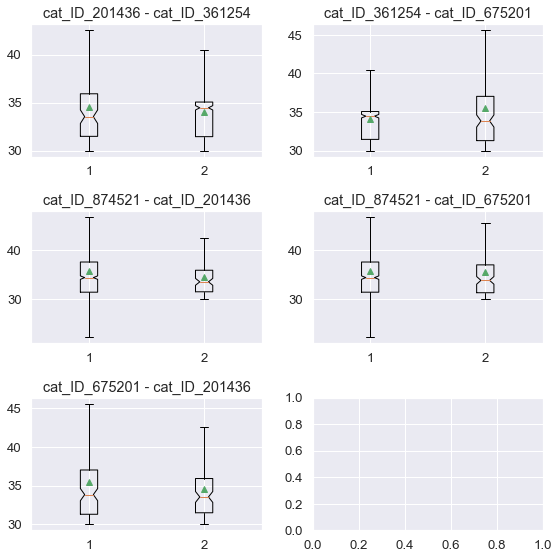

In [75]:
'''
cat_ID_361254 - cat_ID_201436
cat_ID_361254 - cat_ID_675201
cat_ID_874521 - cat_ID_201436
cat_ID_874521 - cat_ID_675201
cat_ID_675201 - cat_ID_201436
'''

fig, ax = plt.subplots(3,2, figsize=(8,8))

ax[0,0].boxplot([item_cat_price_cleaned['cat_ID_201436'], item_cat_price_cleaned['cat_ID_361254']], showmeans=True, notch=True)
ax[0,0].set_title('cat_ID_201436 - cat_ID_361254')

ax[0,1].boxplot([item_cat_price_cleaned['cat_ID_361254'], item_cat_price_cleaned['cat_ID_675201']], showmeans=True, notch=True)
ax[0,1].set_title('cat_ID_361254 - cat_ID_675201')

ax[1,0].boxplot([item_cat_price_cleaned['cat_ID_874521'], item_cat_price_cleaned['cat_ID_201436']], showmeans=True, notch=True)
ax[1,0].set_title('cat_ID_874521 - cat_ID_201436')

ax[1,1].boxplot([item_cat_price_cleaned['cat_ID_874521'], item_cat_price_cleaned['cat_ID_675201']], showmeans=True, notch=True)
ax[1,1].set_title('cat_ID_874521 - cat_ID_675201')

ax[2,0].boxplot([item_cat_price_cleaned['cat_ID_675201'], item_cat_price_cleaned['cat_ID_201436']], showmeans=True, notch=True)
ax[2,0].set_title('cat_ID_675201 - cat_ID_201436')

plt.tight_layout()
plt.show()

In [51]:
from scipy.stats import shapiro, levene, ttest_ind, mannwhitneyu
def stat_matrix_shapiro(item_cat_price_dict):
    keys = item_cat_price_dict.keys()
    shapiro_list = []
    for key in keys:
        test_val, p_val_shapiro_ = shapiro(item_cat_price_dict[key])
        shapiro_list.append(p_val_shapiro_)
    return print(shapiro_list)

In [52]:
df_stats_shapiro = stat_matrix_shapiro(item_cat_price_cleaned)
df_stats_shapiro

[7.24050916516633e-42, 4.479218689138561e-19, 8.517599283119523e-27, 1.7989810894214128e-14, 1.4115332166997341e-11, 2.6402515729273546e-08]


In [53]:
dataset['shapiro p-value'] = [7.24050916516633e-42, 4.479218689138561e-19, 8.517599283119523e-27, 1.7989810894214128e-14, 1.4115332166997341e-11, 2.6402515729273546e-08]
dataset[['shapiro p-value']]

,shapiro p-value
cat_ID_489756,0.0000
cat_ID_361254,0.0000
cat_ID_874521,0.0000
cat_ID_326584,0.0000
cat_ID_675201,0.0000
cat_ID_201436,0.0000


In [122]:
np.median(item_cat_price_cleaned['cat_ID_489756'] + item_cat_price_cleaned['cat_ID_361254'] + item_cat_price_cleaned['cat_ID_874521'])

34.8919456414

In [123]:
np.median(item_cat_price_cleaned['cat_ID_874521']), np.median(item_cat_price_cleaned['cat_ID_361254']), np.median(item_cat_price_cleaned['cat_ID_489756'])

(34.40085974065, 34.45919482955, 35.635784234)

In [120]:
np.median(item_cat_price_cleaned['cat_ID_201436'] + item_cat_price_cleaned['cat_ID_675201'] + item_cat_price_cleaned['cat_ID_326584'])

33.0197740113

In [121]:
np.median(item_cat_price_cleaned['cat_ID_201436']),  np.median(item_cat_price_cleaned['cat_ID_675201']), np.median(item_cat_price_cleaned['cat_ID_326584'])

(33.5346779682, 33.8355657107, 31.7482419128)

In [77]:
[np.median(item_cat_price_cleaned[key]) for key in item_cat_price_cleaned.keys()]

[35.635784234,
 34.45919482955,
 34.40085974065,
 31.7482419128,
 33.8355657107,
 33.5346779682]

In [ ]:
rp.summary_cont(df[["total_bill","tip","size"]])

In [138]:
data1 = item_cat_price_cleaned['cat_ID_489756'] + item_cat_price_cleaned['cat_ID_361254'] + item_cat_price_cleaned['cat_ID_874521']
data2 = item_cat_price_cleaned['cat_ID_201436'] + item_cat_price_cleaned['cat_ID_675201'] + item_cat_price_cleaned['cat_ID_326584']
df_group1 = pd.DataFrame(data =data1,  columns=['group1'] )
df_group2 = pd.DataFrame(data =data2, columns=['group2'] )

In [139]:
rp.summary_cont(df_group1)

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,group1,3075.0000,38.8233,10.8000,0.1948,38.4414,39.2052


In [140]:
rp.summary_cont(df_group2)

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,group2,373.0000,34.4289,4.7009,0.2434,33.9503,34.9076


In [148]:
from scipy.stats import sem, t
confidence = 0.95
data = data1

n = len(data)
m = np.median(data)
print('median : ', m)
std_err = sem(data)
h = std_err * t.ppf((1 + confidence) / 2, n - 1)

start = m - h
print (start)

#1.03675683852
end = m + h
print(end)

median :  34.8919456414
34.51007279909752
35.27381848370248


In [147]:
from scipy.stats import sem, t
confidence = 0.95
data = data2

n = len(data)
m = np.median(data)
print('median : ', m)
std_err = sem(data)
h = std_err * t.ppf((1 + confidence) / 2, n - 1)

start = m - h
print (start)

#1.03675683852
end = m + h
print(end)

median :  33.0197740113
32.541153791181436
33.498394231418565


In [ ]:
()

In [93]:
dataset['Median Price'] = [np.median(item_cat_price_cleaned[key]) for key in item_cat_price_cleaned.keys()]
dataset['Mean Price'] = [np.mean(item_cat_price_cleaned[key]) for key in item_cat_price_cleaned.keys()]
dataset[['Number of price', 'Median Price', 'Mean Price']]

,Number of price,Median Price,Mean Price
cat_ID_489756,1705,35.6358,41.8763
cat_ID_361254,620,34.4592,34.0559
cat_ID_874521,750,34.4009,35.8238
cat_ID_326584,145,31.7482,33.3602
cat_ID_675201,131,33.8356,35.5229
cat_ID_201436,97,33.5347,34.5491


In [90]:
dataset
#dataset.drop('Meen Price', inplace=True, axis=1)

,Number of price,shapiro p-value,Median Price,Mean Price
cat_ID_489756,1705,0.0000,35.6358,41.8763
cat_ID_361254,620,0.0000,34.4592,34.0559
cat_ID_874521,750,0.0000,34.4009,35.8238
cat_ID_326584,145,0.0000,31.7482,33.3602
cat_ID_675201,131,0.0000,33.8356,35.5229
cat_ID_201436,97,0.0000,33.5347,34.5491


In [54]:
def stat_matrix_levene(item_cat_price_dict):
    keys = item_cat_price_dict.keys()
    df_levene_matrix = pd.DataFrame(columns=keys)
    for key1 in keys:
        for key2 in keys:
            if key1 == key2:
                p_val_levene = 0.0
            else:
                test_val, p_val_levene = levene(item_cat_price_dict[key1], item_cat_price_dict[key2])
            df_levene_matrix.loc[key1, key2] = p_val_levene
    return df_levene_matrix

In [55]:
df_stats_levene = stat_matrix_levene(item_cat_price_cleaned)
df_stats_levene

,cat_ID_489756,cat_ID_361254,cat_ID_874521,cat_ID_326584,cat_ID_675201,cat_ID_201436
cat_ID_489756,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
cat_ID_361254,0.0000,0.0000,0.0000,0.0000,0.0000,0.0003
cat_ID_874521,0.0000,0.0000,0.0000,0.0015,0.4033,0.0040
cat_ID_326584,0.0000,0.0000,0.0015,0.0000,0.0485,0.8169
cat_ID_675201,0.0000,0.0000,0.4033,0.0485,0.0000,0.0433
cat_ID_201436,0.0000,0.0003,0.0040,0.8169,0.0433,0.0000


In [56]:
def stat_matrix_ttest_ind(item_cat_price_dict):
    keys = item_cat_price_dict.keys()
    df_ttest_matrix = pd.DataFrame(columns=keys)
    for key1 in keys:
        for key2 in keys:
            if key1 == key2:
                p_val_ttest = 0.0
            else:
                test_val, p_val_ttest = ttest_ind(item_cat_price_dict[key1], item_cat_price_dict[key2])
            df_ttest_matrix.loc[key1, key2] = p_val_ttest
    return df_ttest_matrix

In [57]:
matrix_ttest = stat_matrix_ttest_ind(item_cat_price_cleaned)
matrix_ttest

,cat_ID_489756,cat_ID_361254,cat_ID_874521,cat_ID_326584,cat_ID_675201,cat_ID_201436
cat_ID_489756,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
cat_ID_361254,0.0000,0.0000,0.0000,0.0194,0.0000,0.1457
cat_ID_874521,0.0000,0.0000,0.0000,0.0000,0.5869,0.0399
cat_ID_326584,0.0000,0.0194,0.0000,0.0000,0.0002,0.0301
cat_ID_675201,0.0000,0.0000,0.5869,0.0002,0.0000,0.1351
cat_ID_201436,0.0000,0.1457,0.0399,0.0301,0.1351,0.0000


In [58]:
def stat_matrix_mannwhitneyu(item_cat_price_dict):
    keys = item_cat_price_dict.keys()
    df_mann_matrix = pd.DataFrame(columns=keys)
    for key1 in keys:
        for key2 in keys:
            if key1 == key2:
                p_val_mann = 0.0
            else:
                test_val, p_val_mann = mannwhitneyu(item_cat_price_dict[key1], item_cat_price_dict[key2])
            df_mann_matrix.loc[key1, key2] = p_val_mann
    return df_mann_matrix

In [59]:
matrix_mannwhitneyu = stat_matrix_mannwhitneyu(item_cat_price_cleaned)
matrix_mannwhitneyu

,cat_ID_489756,cat_ID_361254,cat_ID_874521,cat_ID_326584,cat_ID_675201,cat_ID_201436
cat_ID_489756,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
cat_ID_361254,0.0000,0.0000,0.0054,0.0000,0.2115,0.3803
cat_ID_874521,0.0000,0.0054,0.0000,0.0000,0.1700,0.0975
cat_ID_326584,0.0000,0.0000,0.0000,0.0000,0.0000,0.0001
cat_ID_675201,0.0000,0.2115,0.1700,0.0000,0.0000,0.2167
cat_ID_201436,0.0000,0.3803,0.0975,0.0001,0.2167,0.0000


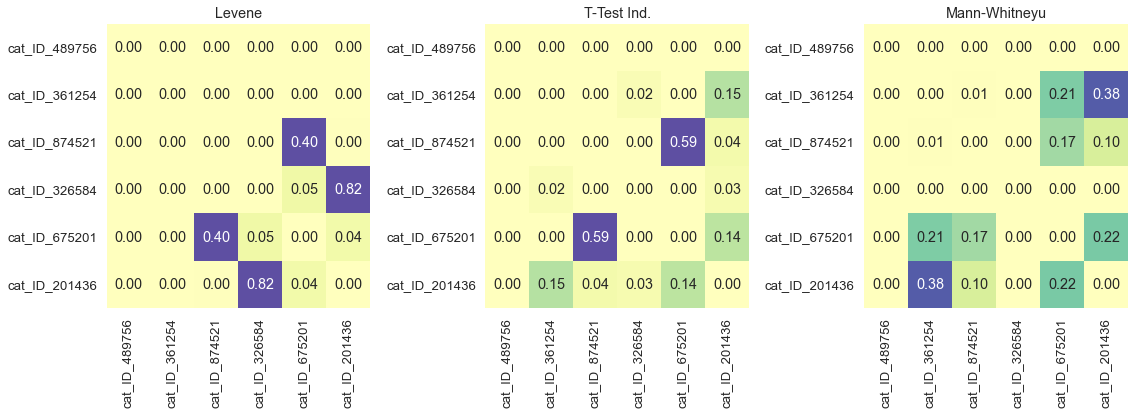

In [62]:
df_stats_levene = df_stats_levene.astype('float64')
matrix_ttest = matrix_ttest.astype('float64')
matrix_mannwhitneyu = matrix_mannwhitneyu.astype('float64')
vmin, vmax = -0.4, 0.4
fig, ax = plt.subplots(1,3, figsize=(16,6))
g1 = sns.heatmap(df_stats_levene, vmin=vmin, vmax=vmax, cmap="Spectral", ax=ax[0], annot=True, fmt=".2f", cbar=False)
g2 = sns.heatmap(matrix_ttest, vmin=vmin, vmax=vmax, cmap="Spectral", ax=ax[1], annot=True, fmt=".2f", cbar=False)
g3 = sns.heatmap(matrix_mannwhitneyu, vmin=vmin, vmax=vmax, cmap="Spectral", ax=ax[2], annot=True, fmt=".2f", cbar=False)
g1.set_title('Levene')
g2.set_title('T-Test Ind.')
g3.set_title('Mann-Whitneyu')
plt.tight_layout()
plt.show()

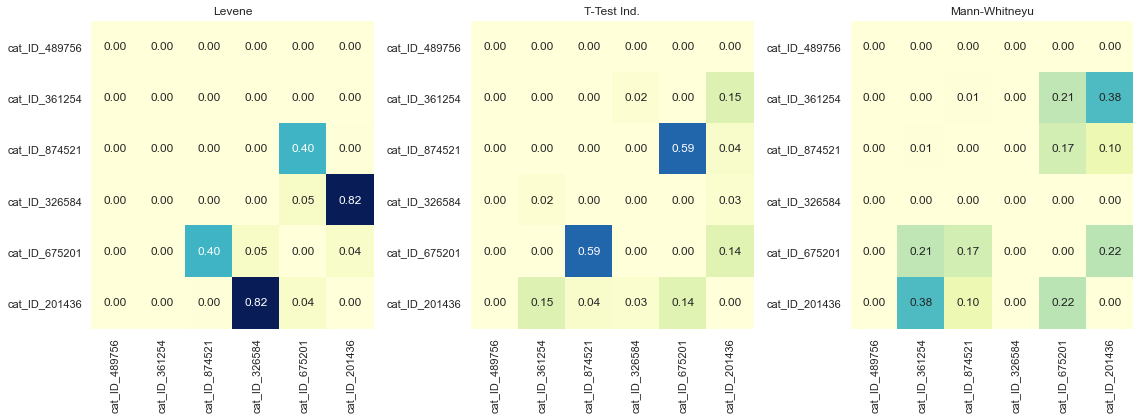

In [385]:
df_stats_levene = df_stats_levene.astype('float64')
matrix_ttest = matrix_ttest.astype('float64')
matrix_mannwhitneyu = matrix_mannwhitneyu.astype('float64')
vmin, vmax = 0.0, 0.8
fig, ax = plt.subplots(1,3, figsize=(16,6))
g1 = sns.heatmap(df_stats_levene, vmin=vmin, vmax=vmax, cmap="YlGnBu", ax=ax[0], annot=True, fmt=".2f", cbar=False)
g2 = sns.heatmap(matrix_ttest, vmin=vmin, vmax=vmax, cmap="YlGnBu", ax=ax[1], annot=True, fmt=".2f", cbar=False)
g3 = sns.heatmap(matrix_mannwhitneyu, vmin=vmin, vmax=vmax, cmap="YlGnBu", ax=ax[2], annot=True, fmt=".2f", cbar=False)
g1.set_title('Levene')
g2.set_title('T-Test Ind.')
g3.set_title('Mann-Whitneyu')
plt.tight_layout()
plt.show()